In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import matplotlib
from matplotlib import pylab as plt
import warnings

In [4]:
warnings.filterwarnings("ignore")

In [2]:
cd ..

/home/jovyan/DATA1030/data1030-project


In [67]:
Airbnb = pd.read_csv('data/Airbnb.csv')

In [68]:
df = Airbnb[Airbnb.price != 0]
X = df.iloc[:, :-1]
y = np.log(df.iloc[:, -1])

In [69]:
def ML_pipeline_kfold_GridSearchCV(X, y, model, param_grid, random_state, n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    pipe = make_pipeline(model)
    grid = GridSearchCV(pipe, param_grid = param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False),
                        cv=kf, return_train_score=True)
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [70]:
lasso_param_grid = {'lasso__alpha': np.logspace(-7, 3, num=11)}
lasso_grid, lasso_test_score = ML_pipeline_kfold_GridSearchCV(X, y, Lasso(max_iter=10000), lasso_param_grid, 1030, 5)
lasso_results = pd.DataFrame(lasso_grid.cv_results_)
print('CV MSE:', -np.around(lasso_results[lasso_results['rank_test_score'] == 1]['mean_test_score'].values[0], 2), \
      '+/-', np.around(lasso_results[lasso_results['rank_test_score'] == 1]['std_test_score'].values[0], 2))
print('test MSE:', -np.around(lasso_test_score, 2))
print(lasso_grid.best_estimator_)
print(lasso_grid.best_score_)
print(lasso_grid.best_index_)
lasso_results

CV MSE: 0.25 +/- 0.01
test MSE: 0.25
Pipeline(memory=None,
         steps=[('lasso',
                 Lasso(alpha=1e-05, copy_X=True, fit_intercept=True,
                       max_iter=10000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
-0.24961049071070188
2


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.579819,1.257337,0.003185,0.000384,1e-07,{'lasso__alpha': 1e-07},-0.267382,-0.246791,-0.254072,-0.244202,...,-0.249611,0.010669,3,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
1,10.150479,0.883061,0.002995,0.000108,1e-06,{'lasso__alpha': 1e-06},-0.267382,-0.246791,-0.254072,-0.244202,...,-0.249611,0.010669,2,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
2,2.408415,0.168318,0.003399,0.000465,1e-05,{'lasso__alpha': 1e-05},-0.267382,-0.246794,-0.254075,-0.244199,...,-0.249610,0.010670,1,-0.244656,-0.249896,-0.248001,-0.250471,-0.252653,-0.249135,0.002686
3,0.228170,0.019302,0.002954,0.000273,0.0001,{'lasso__alpha': 0.0001},-0.267393,-0.246832,-0.254116,-0.244164,...,-0.249616,0.010686,4,-0.244666,-0.249906,-0.248011,-0.250480,-0.252663,-0.249145,0.002686
4,0.045514,0.003872,0.003030,0.000058,0.001,{'lasso__alpha': 0.001},-0.268408,-0.247906,-0.255331,-0.244575,...,-0.250461,0.010896,5,-0.245563,-0.250770,-0.248882,-0.251359,-0.253565,-0.250028,0.002686
5,0.019853,0.001501,0.002915,0.000304,0.01,{'lasso__alpha': 0.01},-0.281609,-0.259595,-0.269029,-0.257861,...,-0.263421,0.011095,6,-0.258558,-0.263677,-0.261849,-0.264795,-0.267096,-0.263195,0.002875
6,0.016644,0.000209,0.002766,0.000019,0.1,{'lasso__alpha': 0.1},-0.351039,-0.321921,-0.345793,-0.334716,...,-0.336356,0.010774,7,-0.331519,-0.337263,-0.334990,-0.337476,-0.340024,-0.336254,0.002855
7,0.016094,0.000676,0.002883,0.000219,1,{'lasso__alpha': 1.0},-0.499488,-0.468659,-0.500314,-0.487126,...,-0.487475,0.011796,8,-0.484440,-0.492141,-0.484230,-0.487528,-0.488859,-0.487439,0.002947
8,0.015851,0.000444,0.002966,0.000354,10,{'lasso__alpha': 10.0},-0.499488,-0.468659,-0.500314,-0.487126,...,-0.487475,0.011796,8,-0.484440,-0.492141,-0.484230,-0.487528,-0.488859,-0.487439,0.002947
9,0.015683,0.000190,0.002749,0.000024,100,{'lasso__alpha': 100.0},-0.499488,-0.468659,-0.500314,-0.487126,...,-0.487475,0.011796,8,-0.484440,-0.492141,-0.484230,-0.487528,-0.488859,-0.487439,0.002947


In [71]:
ridge_param_grid = {'ridge__alpha': np.logspace(-7, 3, num=11)}
ridge_grid, ridge_test_score = ML_pipeline_kfold_GridSearchCV(X, y, Ridge(), ridge_param_grid, 1030, 5)
ridge_results = pd.DataFrame(ridge_grid.cv_results_)
print('CV MSE:', -np.around(ridge_results[ridge_results['rank_test_score'] == 1]['mean_test_score'].values[0], 2), \
      '+/-', np.around(ridge_results[ridge_results['rank_test_score'] == 1]['std_test_score'].values[0], 2))
print('test MSE:', -np.around(ridge_test_score, 2))
print(ridge_grid.best_estimator_)
print(ridge_grid.best_score_)
print(ridge_grid.best_index_)
ridge_results

CV MSE: 0.25 +/- 0.01
test MSE: 0.25
Pipeline(memory=None,
         steps=[('ridge',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
-0.2496105060528902
6


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033340,0.014180,0.004419,0.000830,1e-07,{'ridge__alpha': 1e-07},-0.267382,-0.246791,-0.254072,-0.244202,...,-0.249611,0.010669,7,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
1,0.024377,0.011496,0.005187,0.003919,1e-06,{'ridge__alpha': 1e-06},-0.267382,-0.246791,-0.254072,-0.244202,...,-0.249611,0.010669,6,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
2,0.015812,0.001485,0.002568,0.000164,1e-05,{'ridge__alpha': 1e-05},-0.267382,-0.246791,-0.254072,-0.244202,...,-0.249611,0.010669,5,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
3,0.014945,0.001348,0.002574,0.000312,0.0001,{'ridge__alpha': 0.0001},-0.267382,-0.246791,-0.254072,-0.244202,...,-0.249611,0.010669,4,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
4,0.017237,0.000782,0.002938,0.000356,0.001,{'ridge__alpha': 0.001},-0.267382,-0.246791,-0.254072,-0.244202,...,-0.249611,0.010669,3,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
5,0.014773,0.000941,0.002486,0.000110,0.01,{'ridge__alpha': 0.01},-0.267382,-0.246791,-0.254072,-0.244202,...,-0.249611,0.010669,2,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
6,0.014191,0.000267,0.002595,0.000307,0.1,{'ridge__alpha': 0.1},-0.267382,-0.246791,-0.254074,-0.244201,...,-0.249611,0.010670,1,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
7,0.015295,0.001164,0.002933,0.000774,1,{'ridge__alpha': 1.0},-0.267385,-0.246792,-0.254096,-0.244193,...,-0.249611,0.010677,8,-0.244657,-0.249897,-0.248002,-0.250472,-0.252654,-0.249136,0.002686
8,0.017092,0.000614,0.003065,0.000786,10,{'ridge__alpha': 10.0},-0.267496,-0.246887,-0.254366,-0.244204,...,-0.249701,0.010740,9,-0.244754,-0.249994,-0.248094,-0.250570,-0.252753,-0.249233,0.002688
9,0.018166,0.001140,0.003419,0.001083,100,{'ridge__alpha': 100.0},-0.270033,-0.249369,-0.257496,-0.246286,...,-0.252128,0.011014,10,-0.247203,-0.252442,-0.250445,-0.253082,-0.255294,-0.251693,0.002727


In [10]:
enet_param_grid = {'elasticnet__alpha': np.logspace(-7, 3, num=11),
                   'elasticnet__l1_ratio': np.linspace(0, 1, 21)}
enet_grid, enet_test_score = ML_pipeline_kfold_GridSearchCV(X, y, ElasticNet(), enet_param_grid, 1030, 5)
enet_results = pd.DataFrame(enet_grid.cv_results_)
print('CV MSE:', -np.around(enet_results[enet_results['rank_test_score'] == 1]['mean_test_score'].values[0], 2), \
      '+/-', np.around(enet_results[enet_results['rank_test_score'] == 1]['std_test_score'].values[0], 2))
print('test MSE:', -np.around(enet_test_score, 2))
print(enet_grid.best_estimator_)
print(enet_grid.best_score_)
print(enet_grid.best_index_)
enet_results

CV MSE: 0.25 +/- 0.01
test MSE: 0.25
Pipeline(memory=None,
         steps=[('elasticnet',
                 ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True,
                            l1_ratio=1.0, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
-0.2496100488420831
62


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_elasticnet__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.174505,0.289345,0.003622,0.001218,1e-07,0,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,43,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
1,0.937521,0.194407,0.002453,0.000006,1e-07,0.05,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,44,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
2,0.983922,0.149645,0.002612,0.000237,1e-07,0.1,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,45,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
3,0.799472,0.021263,0.002574,0.000241,1e-07,0.15,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,46,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
4,0.777685,0.011284,0.002458,0.000034,1e-07,0.2,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,47,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
5,0.817214,0.058232,0.002458,0.000033,1e-07,0.25,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,48,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
6,0.780575,0.012549,0.002464,0.000044,1e-07,0.3,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,49,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
7,0.796599,0.022837,0.002497,0.000044,1e-07,0.35,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,50,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
8,0.801844,0.011254,0.002607,0.000134,1e-07,0.4,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,51,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686
9,0.806126,0.019928,0.002494,0.000043,1e-07,0.45,"{'elasticnet__alpha': 1e-07, 'elasticnet__l1_r...",-0.267382,-0.246791,-0.254072,...,-0.249611,0.010669,52,-0.244656,-0.249896,-0.248001,-0.250470,-0.252653,-0.249135,0.002686


In [11]:
rf_param_grid = {'randomforestregressor__max_depth': np.linspace(10, 310, 16), 
                 'randomforestregressor__min_samples_split': [2 ** i for i in range(1, 10)]}
rf_grid, rf_test_score = ML_pipeline_kfold_GridSearchCV(X, y, RandomForestRegressor(n_estimators=100, random_state=1030), 
                                                        rf_param_grid, 1030, 5)
rf_results = pd.DataFrame(rf_grid.cv_results_)
print('CV MSE:', -np.around(rf_results[rf_results['rank_test_score'] == 1]['mean_test_score'].values[0], 2), \
      '+/-', np.around(rf_results[rf_results['rank_test_score'] == 1]['std_test_score'].values[0], 2))
print('test MSE:', -np.around(rf_test_score, 2))
print(rf_grid.best_estimator_)
print(rf_grid.best_score_)
print(rf_grid.best_index_)
rf_results

CV MSE: 0.19 +/- 0.01
test MSE: 0.2
Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=30.0, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=16,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=1030,
                                       verbose=0, warm_start=False))],
         verbose=False)
-0.19371612181152262
12


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.155967,0.047550,0.105930,0.000546,10,2,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.210037,-0.194603,-0.200184,...,-0.197309,0.007631,93,-0.149052,-0.151117,-0.150583,-0.151153,-0.151740,-0.150729,0.000915
1,14.082059,1.117794,0.106239,0.001328,10,4,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.209923,-0.194467,-0.199870,...,-0.197127,0.007629,92,-0.150685,-0.153104,-0.152165,-0.153191,-0.153619,-0.152553,0.001048
2,12.842470,0.446863,0.102737,0.002684,10,8,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.209948,-0.194463,-0.199664,...,-0.197106,0.007622,91,-0.154000,-0.156538,-0.155133,-0.156894,-0.157179,-0.155949,0.001202
3,12.077682,0.155792,0.096014,0.002138,10,16,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.210227,-0.195155,-0.199441,...,-0.197457,0.007453,94,-0.158210,-0.160635,-0.159811,-0.160886,-0.161542,-0.160217,0.001146
4,12.020198,0.095777,0.094734,0.002319,10,32,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.210528,-0.195892,-0.199669,...,-0.197921,0.007330,95,-0.163110,-0.165832,-0.165623,-0.165855,-0.166991,-0.165482,0.001280
5,11.803012,0.120249,0.093072,0.002853,10,64,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.212230,-0.197039,-0.200958,...,-0.199337,0.007364,96,-0.170002,-0.172564,-0.172639,-0.172753,-0.174391,-0.172470,0.001407
6,11.537345,0.122773,0.090939,0.002920,10,128,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.216007,-0.199760,-0.203429,...,-0.201966,0.007882,112,-0.179136,-0.182384,-0.181897,-0.182848,-0.183674,-0.181988,0.001541
7,10.901795,0.227859,0.082035,0.001736,10,256,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.220310,-0.202995,-0.207039,...,-0.205291,0.008478,128,-0.188326,-0.191366,-0.190968,-0.192244,-0.193238,-0.191229,0.001648
8,9.420512,0.089223,0.072135,0.002459,10,512,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.226759,-0.209301,-0.213909,...,-0.211606,0.008691,144,-0.199931,-0.203722,-0.203701,-0.204191,-0.205544,-0.203418,0.001868
9,24.313718,0.153471,0.296644,0.005655,30,2,"{'randomforestregressor__max_depth': 30.0, 'ra...",-0.205535,-0.195625,-0.197697,...,-0.195605,0.006127,61,-0.027323,-0.027449,-0.027519,-0.027831,-0.027630,-0.027550,0.000172


In [64]:
ftr_names = df.columns[:-1]
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=1030)
nr_runs = 10
scores = np.zeros([len(ftr_names), nr_runs])

test_mse = rf_grid.score(X_test, y_test)
print('test MSE = ', -test_mse)
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling ' + str(ftr_names[i]))
    mses = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        mses.append(rf_grid.score(X_test_shuffled, y_test))
    print('   shuffled test score:', -np.around(np.mean(mses), 3), '+/-', np.around(np.std(mses), 3))
    scores[i] = mses

test MSE =  0.19523079480440234
shuffling neighbourhood_group_Bronx
   shuffled test score: 0.195 +/- 0.0
shuffling neighbourhood_group_Brooklyn
   shuffled test score: 0.195 +/- 0.0
shuffling neighbourhood_group_Manhattan
   shuffled test score: 0.234 +/- 0.002
shuffling neighbourhood_group_Queens
   shuffled test score: 0.195 +/- 0.0
shuffling neighbourhood_group_Staten Island
   shuffled test score: 0.195 +/- 0.0
shuffling room_type
   shuffled test score: 0.506 +/- 0.005
shuffling latitude
   shuffled test score: 0.257 +/- 0.002
shuffling longitude
   shuffled test score: 0.296 +/- 0.003
shuffling availability_365
   shuffled test score: 0.251 +/- 0.002
shuffling name
   shuffled test score: 0.2 +/- 0.001
shuffling minimum_nights
   shuffled test score: 0.248 +/- 0.002
shuffling number_of_reviews
   shuffled test score: 0.203 +/- 0.0
shuffling last_review
   shuffled test score: 0.2 +/- 0.0
shuffling reviews_per_month
   shuffled test score: 0.204 +/- 0.001
shuffling calculated_hos

In [65]:
rf_param_grid2 = {'randomforestregressor__max_depth': np.linspace(10, 310, 16), 
                  'randomforestregressor__min_samples_split': [2 ** i for i in range(1, 10)]}
rf_grid2, rf_test_score2 = ML_pipeline_kfold_GridSearchCV(X, y, RandomForestRegressor(n_estimators=100, random_state=42), 
                                                          rf_param_grid2, 1030, 5)
rf_results2 = pd.DataFrame(rf_grid2.cv_results_)
print('CV MSE:', -np.around(rf_results2[rf_results2['rank_test_score'] == 1]['mean_test_score'].values[0], 2), \
      '+/-', np.around(rf_results2[rf_results2['rank_test_score'] == 1]['std_test_score'].values[0], 2))
print('test MSE:', -np.around(rf_test_score2, 2))
print(rf_grid2.best_estimator_)
print(rf_grid2.best_score_)
print(rf_grid2.best_index_)
rf_results2

CV MSE: 0.19 +/- 0.01
test MSE: 0.2
Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=50.0, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=16,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False))],
         verbose=False)
-0.193318538152447
21


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.452698,0.746956,0.092472,0.004620,10,2,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.209437,-0.193397,-0.199288,...,-0.196747,0.007392,92,-0.149312,-0.151015,-0.150637,-0.150792,-0.152042,-0.150760,0.000874
1,12.100497,1.746256,0.089537,0.003857,10,4,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.209439,-0.193439,-0.199061,...,-0.196664,0.007382,91,-0.150939,-0.152955,-0.152203,-0.152856,-0.153809,-0.152552,0.000955
2,12.549576,0.466974,0.100041,0.003147,10,8,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.209612,-0.193634,-0.198866,...,-0.196762,0.007368,93,-0.154312,-0.156678,-0.155277,-0.156847,-0.157247,-0.156072,0.001102
3,13.127858,0.127090,0.106319,0.001806,10,16,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.210132,-0.194183,-0.198886,...,-0.197116,0.007413,94,-0.158433,-0.160616,-0.159777,-0.160930,-0.161598,-0.160271,0.001090
4,13.192676,0.108821,0.102805,0.000355,10,32,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.210594,-0.195175,-0.199150,...,-0.197634,0.007349,95,-0.163301,-0.165783,-0.165314,-0.165804,-0.166979,-0.165436,0.001201
5,12.952085,0.083865,0.100855,0.000780,10,64,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.212415,-0.196453,-0.200331,...,-0.199038,0.007438,96,-0.170266,-0.172642,-0.172284,-0.172621,-0.174443,-0.172451,0.001329
6,17.297986,5.498864,0.104674,0.016356,10,128,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.216127,-0.199296,-0.203191,...,-0.201782,0.007935,112,-0.179354,-0.182348,-0.181567,-0.182524,-0.183620,-0.181883,0.001424
7,14.344684,2.447434,0.094864,0.009953,10,256,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.220217,-0.202875,-0.207148,...,-0.205264,0.008402,128,-0.188436,-0.191273,-0.191234,-0.192270,-0.193378,-0.191318,0.001641
8,12.288267,0.593040,0.086619,0.011857,10,512,"{'randomforestregressor__max_depth': 10.0, 'ra...",-0.226520,-0.209165,-0.213744,...,-0.211366,0.008680,144,-0.199962,-0.203574,-0.203709,-0.203801,-0.205342,-0.203277,0.001778
9,28.556222,0.731605,0.348006,0.025065,30,2,"{'randomforestregressor__max_depth': 30.0, 'ra...",-0.203827,-0.194496,-0.198736,...,-0.195069,0.005810,61,-0.027127,-0.027465,-0.027519,-0.027540,-0.027897,-0.027509,0.000245


In [187]:
y_pred = [np.mean(y_test)] * len(y_test)
print(r2_score(y_test, y_pred))
print(r2_score(y_test, rf_grid.best_estimator_[0].predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.exp(np.sqrt(mean_squared_error(y_test, y_pred))))
print(np.sqrt(-rf_test_score))
print(np.exp(np.sqrt(-rf_test_score)))

0.0
0.8155725875405846
0.6984013140542182
2.0105359213192897
0.44184928969548243
1.555581280638291


In [59]:
rf_grid.best_estimator_[0].feature_importances_

array([2.33365671e-04, 3.71877406e-04, 3.56461098e-02, 4.07646414e-04,
       5.44991316e-05, 4.65112029e-01, 1.15504979e-01, 1.23461231e-01,
       6.31242170e-02, 3.77008527e-02, 4.12295619e-02, 2.39470031e-02,
       3.36310884e-02, 2.94694175e-02, 2.44133943e-02, 3.34981766e-03,
       2.34291097e-03])

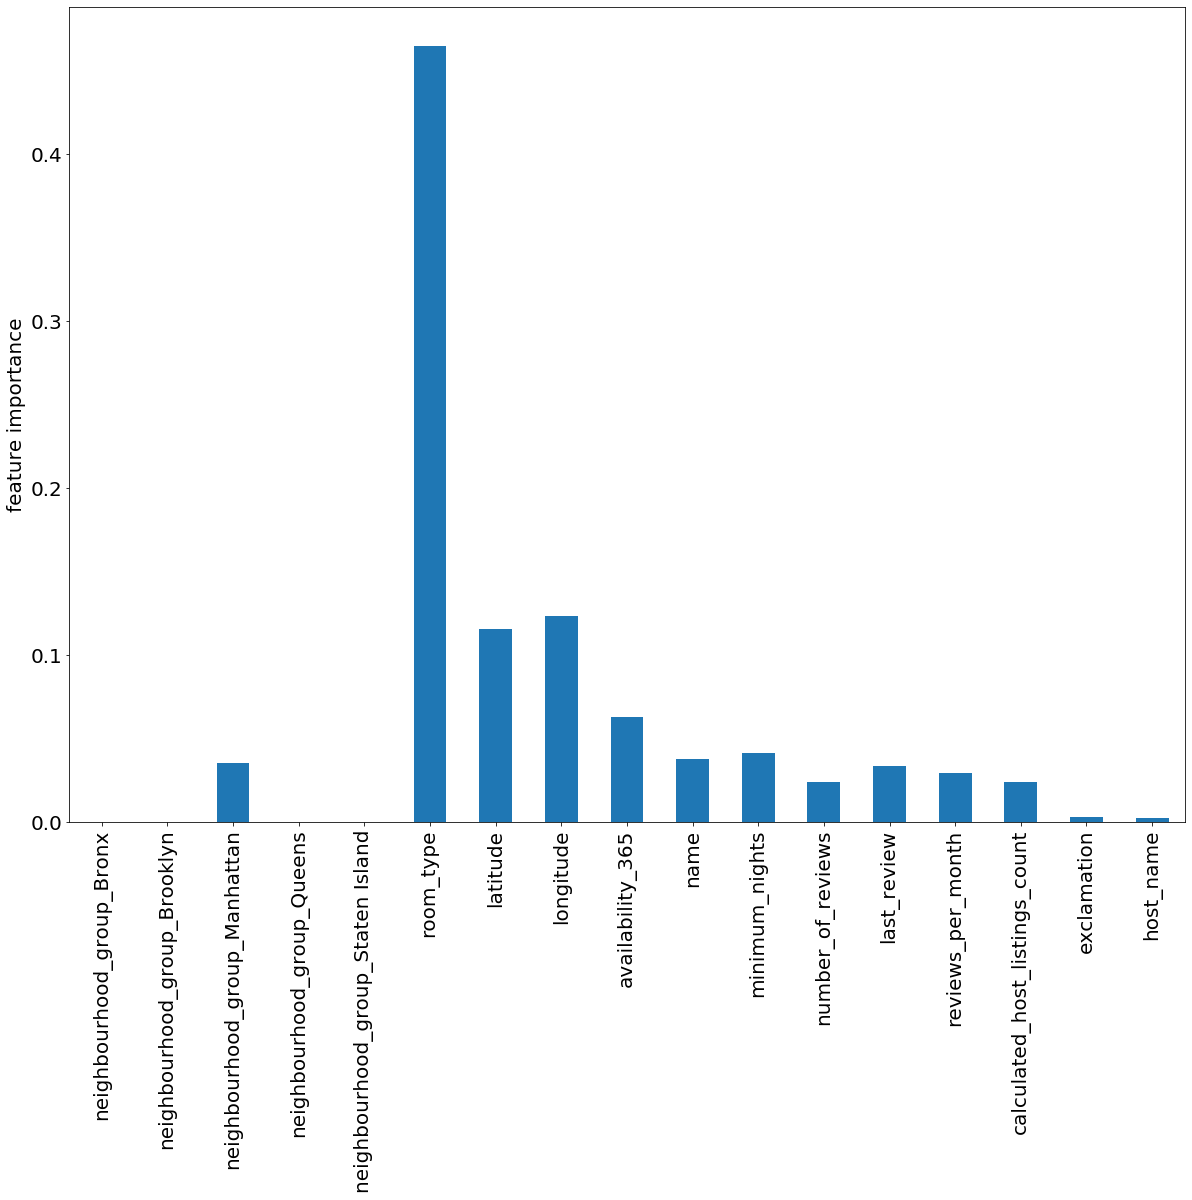

In [169]:
d = {'ftr_imp': rf_grid.best_estimator_[0].feature_importances_}
pd.DataFrame(d, index=ftr_names).plot.bar(legend=None, figsize=(20, 15))
plt.ylabel('feature importance')
plt.show()